# 0. Importando as Bibliotecas

In [97]:
import pandas as pd
import seaborn as sns
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 1. Construção da Carteira

In [83]:
# Período
inicio ="2018-01-01"
fim = "2020-12-30"

# Ativos
ativos = ['PETR4.SA', 'VALE3.SA', 'BBAS3.SA', 'BBDC4.SA', 'ITSA4.SA', 'ABEV3.SA', 'WEGE3.SA', 'TAEE4.SA']

In [215]:
pesos = np.array([1, 1, 1, 1, 1, 1, 1, 1])/len(ativos)

In [216]:
carteira = yf.download(ativos, start=inicio, end=fim, progress=False)['Adj Close']

In [217]:
carteira.head()

Ticker,ABEV3.SA,BBAS3.SA,BBDC4.SA,ITSA4.SA,PETR4.SA,TAEE4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,
2018-01-02,16.341455,10.412952,13.312099,5.105381,4.914455,3.485597,25.033352,8.670936
2018-01-03,16.379128,10.545766,13.373296,5.165554,4.958998,3.541981,24.883347,8.539245
2018-01-04,16.288717,10.646949,13.592722,5.262753,4.967905,3.459966,24.985352,8.456071
2018-01-05,16.348989,10.646949,13.669709,5.272011,4.997600,3.541981,25.375374,8.490726
2018-01-08,16.318853,10.672252,13.665865,5.267384,5.056990,3.541981,25.939405,8.560038


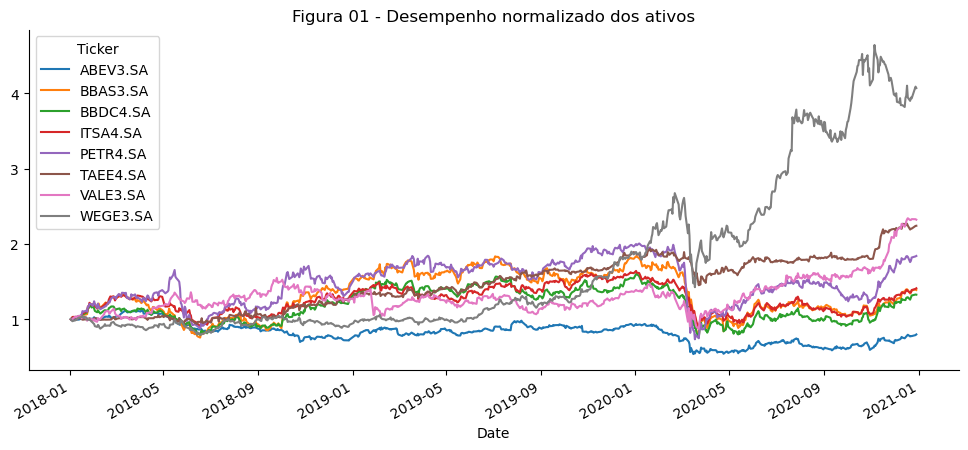

In [234]:
(carteira/carteira.iloc[0]).plot(figsize=(12,5))
plt.title('Figura 01 - Desempenho normalizado dos ativos')
sns.despine()
plt.savefig('imagens/Figura 01 - Desempenho normalizado dos ativos')

# 2. Retorno

 ### Retorno Diário

In [219]:
retornos = carteira.pct_change()

Retorno diário da carteira

In [220]:
retorno_carteira = (retornos * pesos).sum(axis=1)

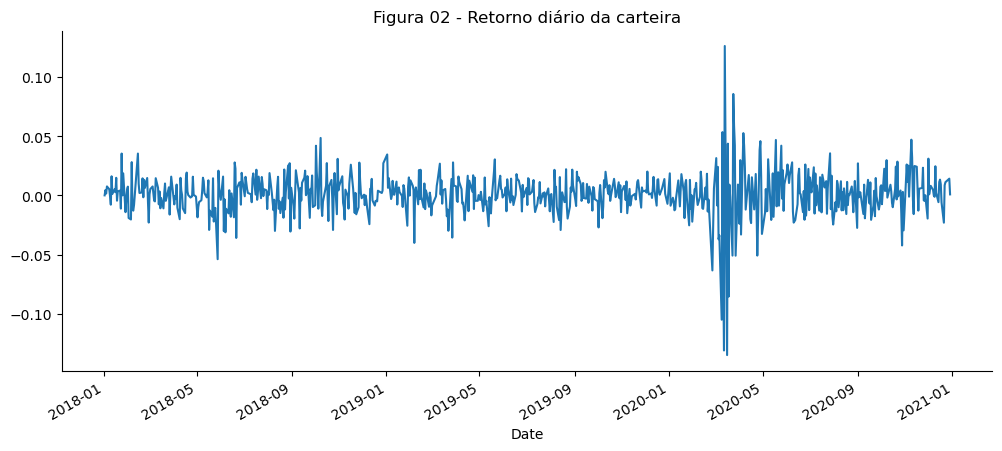

In [235]:
# Podemos ver o período de mais estresse: Pandemia houve grande volatilidade
retorno_carteira.plot(figsize=(12,5))
plt.title('Figura 02 - Retorno diário da carteira')
sns.despine()
plt.savefig('imagens/Figura 02 - Retorno diário da carteira')

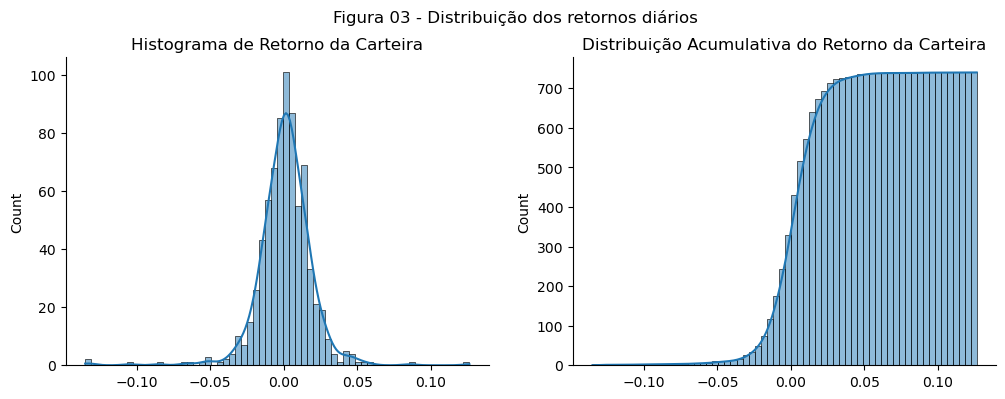

In [240]:
plt.figure(figsize=(12,4))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.set_title('Histograma de Retorno da Carteira')
sns.histplot(retorno_carteira, kde=True, ax=ax1)
sns.despine()

ax2.set_title('Distribuição Acumulativa do Retorno da Carteira')
sns.histplot(retorno_carteira, kde=True, cumulative=True, ax=ax2)
sns.despine()

plt.suptitle('Figura 03 - Distribuição dos retornos diários', y=1.0)
plt.savefig('imagens/Figura 03 - Distribuição')

$$\text{Retorno médio: } \mu_{anual} = \mu_{diária} \times 252$$
$$\text{Volatilidade: } \sigma_{anual} = \sigma_{diária} \times \sqrt{252}$$

In [223]:
mi_anualizado = retorno_carteira.mean() * 252
sigma_anualizado = retorno_carteira.std() * np.sqrt(252)

print(f'Retorno anual = {mi_anualizado:.2%}')
print(f'Volatilidade Anualizada = {sigma_anualizado:.2%}')

Retorno anual = 27.01%
Volatilidade Anualizada = 29.37%


**Observação:**
1. Para simplicação, vamos assumir que os retornos são normalmente distribuídos. Isso significa que, daqui um ano, essa carteira pode apresentar um retorno entre **-2.36%** a **56.38%**, com 68% de chance. Esse é o intervalor que está entre -1 a 1 desvio padrão do retorno médio.
2. No gráfico do retorno diário, podemos facilmente notar que, no início de 2020, a carteira passou por um período de grande volatilidade. Nesse período, de pandemia, o mercado como um todo, sofreu grandes quedas, representando um período de alta incertezas e desconfiança por parte do investidor quanto ao futuro.

* Verificando o retorno da carteira após a data final do período analisado

In [224]:
# Baixando a cotação até os dias atuais
pos_2020 = yf.download(ativos, start="2020-12-30", progress=False)['Adj Close']

# Calculando os retornos de cada ativo
retorno_pos_2020 = (pos_2020.iloc[-1]/pos_2020.iloc[0] - 1) 

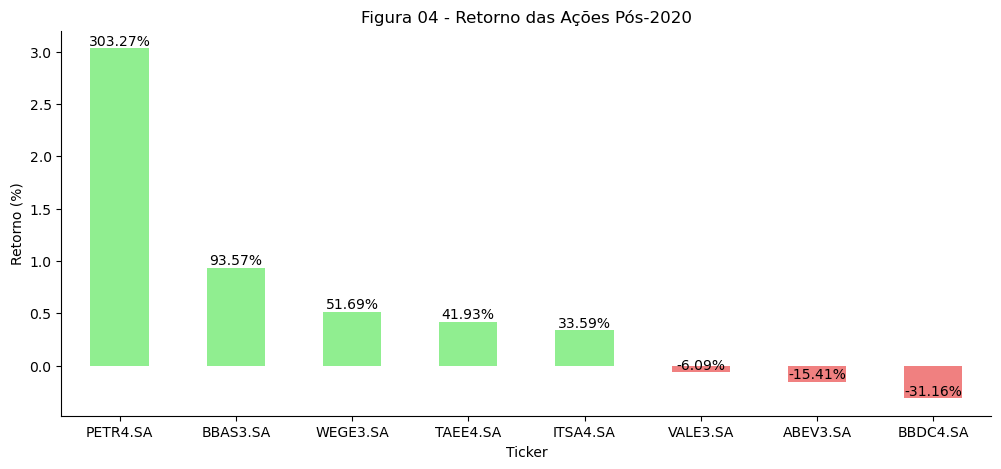

In [242]:
# Ordena os retornos e define as cores
retorno_ordenado = retorno_pos_2020.sort_values(ascending=False)
cores = ['lightgreen' if r > 0 else 'lightcoral' for r in retorno_ordenado] 

plt.figure(figsize=(12, 5))
ax = retorno_ordenado.plot.bar(color=cores)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)

sns.despine()
plt.ylabel('Retorno (%)')
plt.title('Figura 04 - Retorno das Ações Pós-2020')
plt.xticks(rotation=0)
plt.savefig('imagens/Figura 04 - Retorno das Ações Pós-2020')
plt.show()

In [227]:
# Intervalo esperado
int_superior = mi_anualizado + 1 * sigma_anualizado
int_inferior = mi_anualizado - 1 * sigma_anualizado

# Considerando que cada ativo mantem a mesma proporção, ou seja, 
retorno_carteira_pos_2020 = (retorno_pos_2020 * pesos).sum()

# Retorno da Carteira
print('+++ Retorno da Carteira +++')
print(f'Intervalo esperado: {int_inferior:.2%} a {int_superior:.2%}')
print(f'Retorno da carteira foi de: {retorno_carteira_pos_2020:.2%}')

+++ Retorno da Carteira +++
Intervalo esperado: -2.36% a 56.38%
Retorno da carteira foi de: 58.92%


**Observações:**
1. Embora o resultado não esteja dentro do intervalo previsto, ele superou as expectativas! De fato, quanto maior a volatilidade de um ativo ou de uma carteira, maior tende a ser a variação nos preços, tornando-os menos previsíveis. 

 ### Retorno Acumulado

In [228]:
retorno_acumulado_carteira = (1 + retorno_carteira).cumprod() - 1

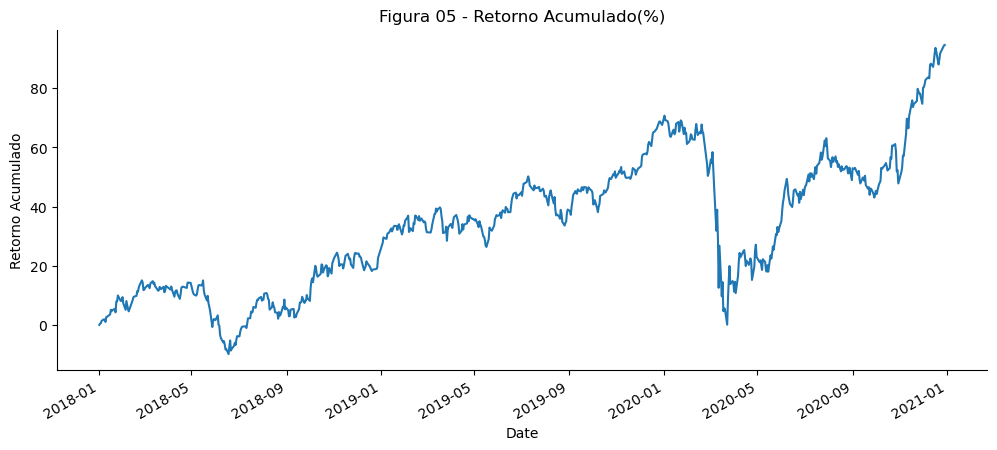

In [253]:
(retorno_acumulado_carteira * 100).plot(figsize=(12, 5))
sns.despine()
plt.title('Figura 05 - Retorno Acumulado(%)')
plt.ylabel('Retorno Acumulado')
plt.savefig('imagens/Figura 05 - Retorno Acumulado')

# 3. Comparando desempenho

In [230]:
ibov = yf.download('^BVSP', start=inicio, end=fim, progress=False)['Adj Close']
retorno_ibov = ibov.pct_change()
retorno_acumulado_ibov = (1 + retorno_ibov).cumprod() - 1

In [231]:
retorno_portfolio = pd.DataFrame()
retorno_portfolio['Retorno_Carteira'] = retorno_acumulado_carteira
retorno_portfolio['Retorno_Ibov'] = retorno_acumulado_ibov
retorno_portfolio = retorno_portfolio.dropna()

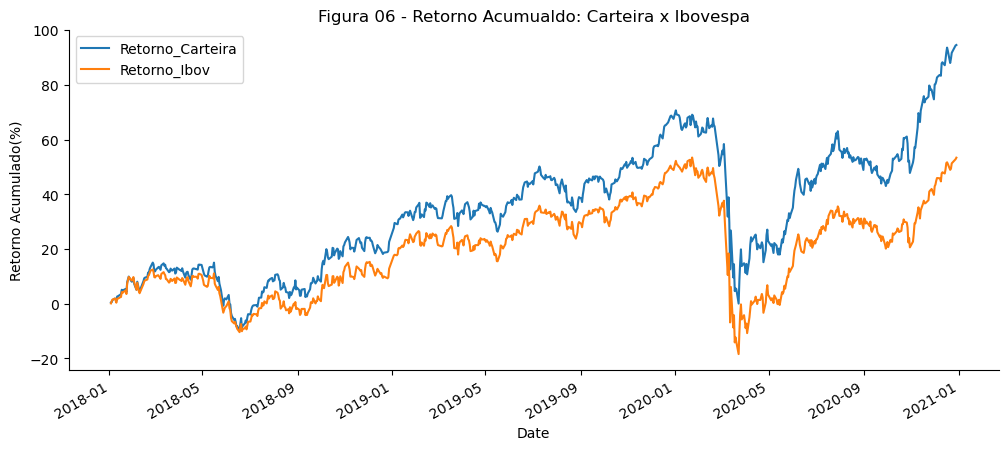

In [254]:
(retorno_portfolio * 100).plot(figsize=(12, 5))
sns.despine()
plt.title('Figura 06 - Retorno Acumualdo: Carteira x Ibovespa')
plt.ylabel('Retorno Acumulado(%)')
plt.savefig('imagens/Figura 06 - Retorno Acumualdo (Carteira x Ibovespa)')

In [257]:
retorno_portfolio.iloc[-1] * 100

Retorno_Carteira    94.572905
Retorno_Ibov        53.387426
Name: 2020-12-29 00:00:00, dtype: float64